# Simple Sample

簡単な例で BNN モジュールを実行する notebook

> Note: この notebook は docker 上で実行されることを想定に記述されています。 local で実行する際には `bnn` モジュールへ path を通す為以下を加える必要があります

```python
import sys
sys.path.append('../')
```

## やること

* BNNEstimator の学習
* 事後分布の取得及びその可視化

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# docker でない場合は必要
# import sys
# sys.path.append('../')

epoch: 100	loss:0.42214980721473694
epoch: 200	loss:0.2732931971549988
epoch: 300	loss:0.2399078756570816
epoch: 400	loss:0.21625953912734985
epoch: 500	loss:0.25088199973106384
epoch: 600	loss:0.22104299068450928
epoch: 700	loss:0.21905700862407684
epoch: 800	loss:0.20681239664554596
epoch: 900	loss:0.21096214652061462
epoch: 1000	loss:0.20002880692481995


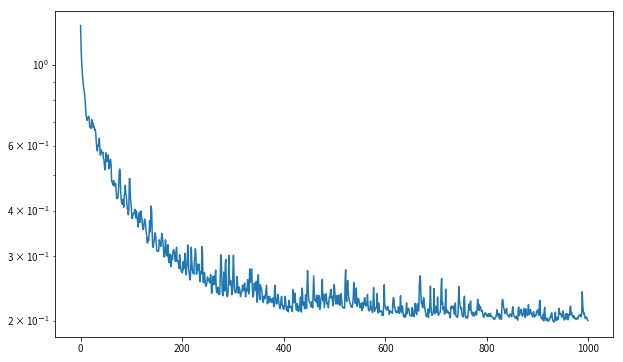

In [2]:
from bnn import BNNEstimator
from bnn import article_data

clf = BNNEstimator(1, 1, hidden_dim=100)

x_train, y_train, _ = article_data.make_data(size=100, function_type="art1")

# data_name は出力先のフォルダを作成するのに必要
# ./data/{data_name}/{conditions}/ に
# 50エポックごとの事後分布による予測結果の画像が保存される
clf.fit(x_train, y_train, data_name="art1", batch_size=10, freq_print_loss=100)

## 予測結果の可視化

BNN を使って重みの事後分布から予測値のサンプルを取り出してそれらを可視化してみます。

`clf.posterior` を用いると n_samples だけ事後分布から重みをサンプルし、それらの重みを使った時の予測値を配列で取得できます。返り値は shape = (n_test, n_samples) です

In [3]:
x_test = np.linspace(-2, 2, 200)

# 100 個の事後分布からの実現値を使った予測値を取得
y_pos = clf.posterior(x_test, n=100)
y_pos.shape

(100, 200)

In [4]:
pos_mean = y_pos.mean(axis=0)
pos_var = y_pos.var(axis=0)

In [5]:
tau = (1 - clf.model.mask.prob) * clf.model.lengthscale ** 2. / (2 * len(x_train) * clf.weight_decay)

In [6]:
pos_var += tau ** -1

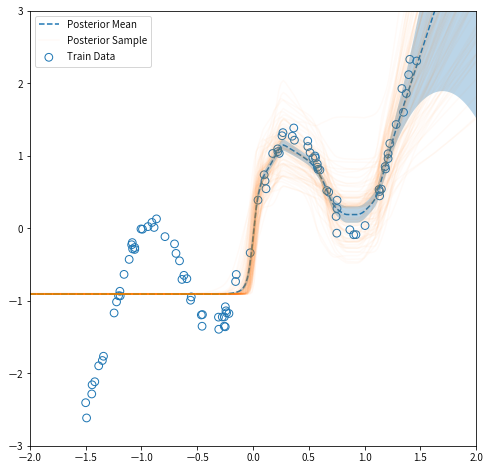

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, s=60, facecolors='none', edgecolors='C0', label='Train Data')
plt.plot(x_test, pos_mean, '--', label='Posterior Mean')
plt.fill_between(x_test, pos_mean + pos_var, pos_mean - pos_var, alpha=.3)
for i, y in enumerate(y_pos):
    if i == 0:
        label = 'Posterior Sample'
    else:
        label = None
    plt.plot(x_test, y, color='C1', alpha=3. / len(y_pos), label=label)

plt.ylim(-3, 3)
plt.xlim(-2, 2)
plt.legend()